In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree = degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

In [3]:
np.random.seed(2048)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

In [4]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

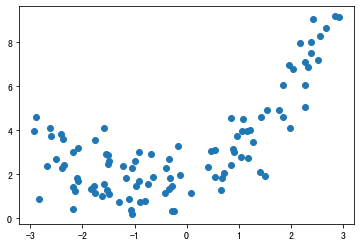

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [7]:
poly_reg = PolynomialRegression(20)
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [8]:
mean_squared_error(y_test, poly_reg.predict(X_test))

2.738167937208995

In [9]:
from sklearn.linear_model import Lasso, Ridge

In [10]:
def RidgeRegression(degree, alpha):
    return  Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", Ridge(alpha=alpha))])

In [11]:
ridge1 = RidgeRegression(20, 0.0001)
ridge1.fit(X_train,y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', Ridge(alpha=0.0001))])

In [12]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)

    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

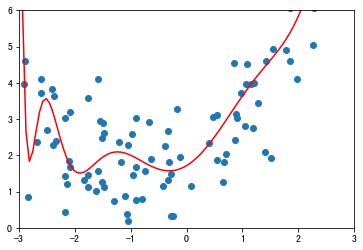

In [13]:
plot_model(ridge1)

In [14]:
mean_squared_error(y_test, ridge1.predict(X_test))

1.5417914590132509

In [15]:
ridge2 = RidgeRegression(20, 1)
ridge2.fit(X_train,y_train)
mean_squared_error(y_test, ridge2.predict(X_test))

1.2170701155108838

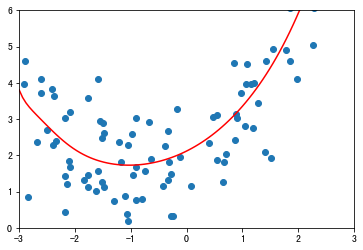

In [16]:
plot_model(ridge2)

In [17]:
ridge3 = RidgeRegression(20, 10000000)
ridge3.fit(X_train,y_train)
mean_squared_error(y_test, ridge3.predict(X_test))

5.101044156468558

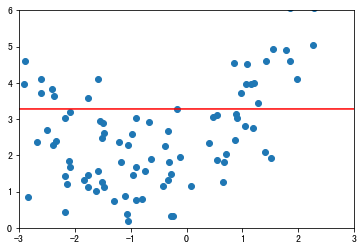

In [18]:
plot_model(ridge3)

In [19]:
def LassoRegression(degree, alpha):
    return  Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", Lasso(alpha=alpha))])

In [20]:
lasso1 = LassoRegression(20, 0.01)
lasso1.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', Lasso(alpha=0.01))])

In [21]:
mean_squared_error(y_test, lasso1.predict(X_test))

1.2849558756851889

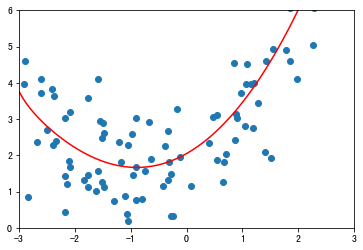

In [22]:
plot_model(lasso1)

1.3473003122746556


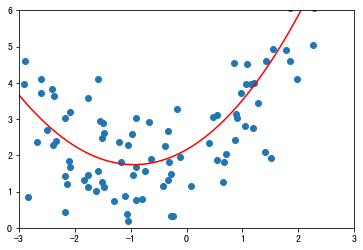

In [23]:
lasso2 = LassoRegression(20, 0.1)
lasso2.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso2.predict(X_test)))
plot_model(lasso2)

3.3882959222977043


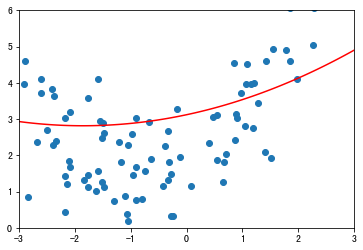

In [24]:
lasso3 = LassoRegression(20, 1)
lasso3.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso3.predict(X_test)))
plot_model(lasso3)

5.1012704912753986


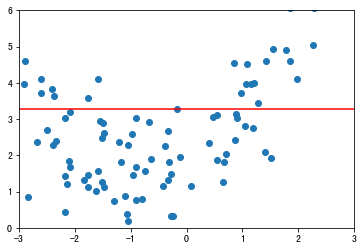

In [25]:
lasso4 = LassoRegression(20, 10)
lasso4.fit(X_train, y_train)
print(mean_squared_error(y_test, lasso4.predict(X_test)))
plot_model(lasso4)